In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import svm
from sklearn import datasets
import pandas as pd
from sklearn import metrics
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def draw_heat(y_test, y_pred):
    class_names = [0, 1]
    fig, ax = plt.subplots()
    ticks = np.arange(len(class_names))
    plt.xticks(ticks, class_names)
    plt.yticks(ticks, class_names)

    sns.heatmap(pd.DataFrame(
        metrics.confusion_matrix(y_test, y_pred)),
        annot=True)
    plt.ylabel('Действительные значения')
    plt.xlabel('Предсказанные значения')

In [3]:
def model_metrics(model, X, Y):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                   random_state=True)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    draw_heat(y_test, y_pred)
    print('Метрика достоверности предсказания:')
    print(metrics.accuracy_score(y_test, y_pred))
    print('Метрика точности:')
    print(metrics.precision_score(y_test, y_pred, average='macro'))
    print('Метрика полноты')
    print(metrics.recall_score(y_test, y_pred, average='macro'))

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 
             'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('pima-indians-diabetes.csv', header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
Y = pima.label
X = pima.drop(['label'], axis=1)

Метрика достоверности предсказания:
0.7792207792207793
Метрика точности:
0.7718540902223181
Метрика полноты
0.7313131313131314


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


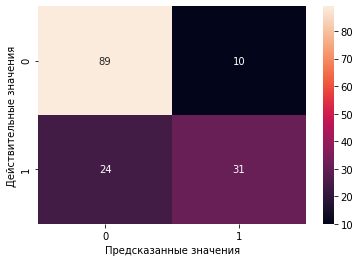

In [6]:
cls = LogisticRegression()
model_metrics(cls, X, Y)

## Контрольные вопросы


1.	Какие выводы мы можем сделать на основании метрик модели, построенной в данной лабораторной работе?

Примерная точность 77%, что является достаточно высоким результатом, но так как область нашего исследования - медицина, лучше увеличить точнось

2.	Чем логистическая регрессия отличается от линейной?

Логистическая регрессия, в отличие от линейной регрессии, предсказывает значения, которые ограничены интервалом (0, 1), то есть вероятности или коэффициенты

3.	С помощью каких методов происходит оптимизация параметров логистической регрессии?

Оптимизация параметров логистической регрессии происходит через параметр solver с возможными значениями ‘newton-cg’, ‘lbfgs’ (по умолчанию), ‘liblinear’, ‘sag’, ‘saga’

4.	Почему метрики достоверности предсказания недостаточно для оценки эффективности модели?

Эта метрика бесполезна в задачах с неравными классами, поэтому нужны оценки качества работы алгоритма на каждом из классов по отдельности 

5.	Что такое метрика F1? Какие еще метрики из этого семейства существуют и для чего они служат?

Удобно для характеристики классификатора использовать одну величину вместо двух (Precision и Recall) - метрику F1 — среднее гармоническое precision и recall (Классификация ошибки метрики)

6.	Чем метод опорных векторов отличается от логистической регрессии? В чем его достоинства и недостатки?

Логистическая регрессия позволяет оценивать вероятности принадлежености классам
Метод опорных векторов максимизирует отступы объектов. При этом он позволяет очень легко перейти к построению нелинейной разделяющей поверхности благодаря ядровому переходу. 

Недостаток метода состоит в том, что для классификации используется не все множество образцов, а лишь их небольшая часть, которая находится на границах.

Достоинство метода состоит в том, что для классификации методом опорных векторов, в отличие от большинства других методов, достаточно небольшого набора данных.

7.	В чем особенности метода ближайших соседей?

Анализируемый объект принадлежит к тому же классу, что и основная масса его соседей, то есть k ближайших к нему объектов анализируемой выборки

## Дополнительные задания

1.	Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.

2.	Сравните метрики эффективности и сделайте вывод о том, какая модель лучше предсказывает заболевание.


Метод опорных векторов
Метрика достоверности предсказания:
0.7857142857142857
Метрика точности:
0.799264705882353
Метрика полноты
0.7242424242424242


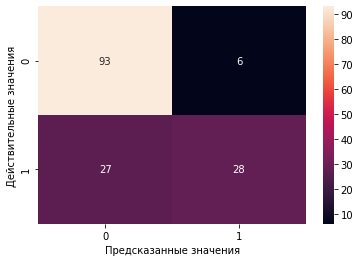

In [7]:
print('Метод опорных векторов')
cls = svm.SVC()
model_metrics(cls, X, Y)

3.	Постройте модели классификации на основе следующих методов:
a.	логистическая регрессия (LogisticRegression);
b.	метод опорных векторов с линейным ядром (SVC);
c.	метод опорных векторов с гауссовым ядром (SVC);
d.	метод k ближайших соседей (KNeighborsClassifier);
e.	многослойный перцептрон (MLP);

Метод опорных векторов с линейным ядром (SVC)
Метрика достоверности предсказания:
0.7792207792207793
Метрика точности:
0.7718540902223181
Метрика полноты
0.7313131313131314


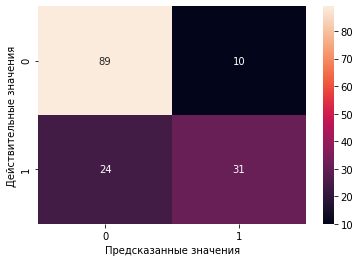

In [8]:
print('Метод опорных векторов с линейным ядром (SVC)')
cls = svm.SVC(kernel='linear')
model_metrics(cls, X, Y)

Метод опорных векторов с гауссовым ядром (SVC)
Метрика достоверности предсказания:
0.7857142857142857
Метрика точности:
0.799264705882353
Метрика полноты
0.7242424242424242


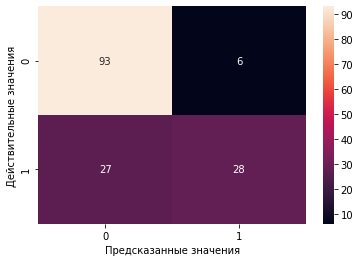

In [9]:
print('Метод опорных векторов с гауссовым ядром (SVC)')
cls = svm.SVC(kernel='rbf')
model_metrics(cls, X, Y)

Метод k ближайших соседей (KNeighborsClassifier)
Метрика достоверности предсказания:
0.7337662337662337
Метрика точности:
0.7097091194968554
Метрика полноты
0.6959595959595959


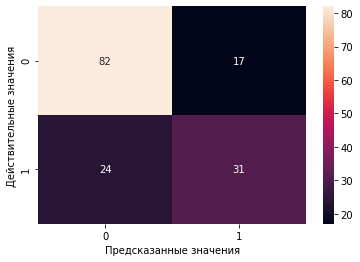

In [10]:
print('Метод k ближайших соседей (KNeighborsClassifier)')
cls = KNeighborsClassifier()
model_metrics(cls, X, Y)

Многослойный перцептрон (MLP)
Метрика достоверности предсказания:
0.6038961038961039
Метрика точности:
0.6317708333333334
Метрика полноты
0.6393939393939394


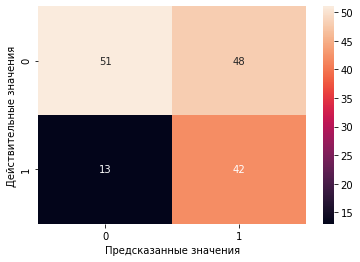

In [11]:
print('Многослойный перцептрон (MLP)')
cls = MLPClassifier()
model_metrics(cls, X, Y)

4.	Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;


По метрике достоверности предсказания и по метрике точности лучшей моделью является Метод опорных векторов с гауссовым ядром

5.	Для каждой модели из п.3 постройте кривые обучения и диагностируйте недо-/переобучение модели. Попробуйте изменить параметр регуляризации для улучшения результатов модели.


6.	Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).

In [12]:
df = datasets.load_iris()
X = df['data']
Y = df['target']

Метрика достоверности предсказания:
0.9666666666666667
Метрика точности:
0.9523809523809524
Метрика полноты
0.9743589743589745


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


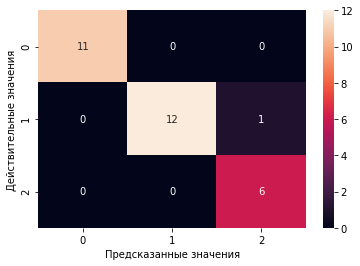

In [13]:
cls = LogisticRegression()
model_metrics(cls, X, Y)